# A7: Data analysis in Python

In [78]:
# Run once then delete this cell
!pip install statsmodels
!pip install seaborn

In [103]:
import numpy as np
import pandas as pd
import plotly.express as px
from scipy import interpolate # Interpolartion module
from scipy import integrate # Integration module
import matplotlib.pyplot as plt
from io import StringIO

## Data representations

### Pandas DataFrames

Consider an Excel or csv file with columns of data containing volumes and pressures:

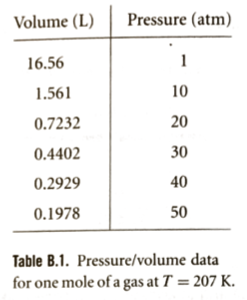

We can bring this data into Python by making a pandas DataFrame; in general, the easiest way to do this is to import the `.csv` or `.xlsx` file (`pd.read_csv` or `pd.read_excel`). In this case, we'll just put the `.csv` data into a string in Python:

In [104]:
PV_csv=StringIO("""
V_L,P_atm
16.56,1
1.561,10
0.7232,20
0.4402,30
0.2929,40
0.1978,50
""")
# read the data into a data frame
df = pd.read_csv(PV_csv)

# Extract the columns into numpy arrays
V_L = df['V_L'].values
P_atm = df['P_atm'].values

# Show the data frame
df

,V_L,P_atm
0,16.5600,1
1,1.5610,10
2,0.7232,20
3,0.4402,30
4,0.2929,40
5,0.1978,50


It's useful to have a function that can estimate the pressure at a different molar volume - this is the mathematical process of interpolation:

<div>
  <figure>
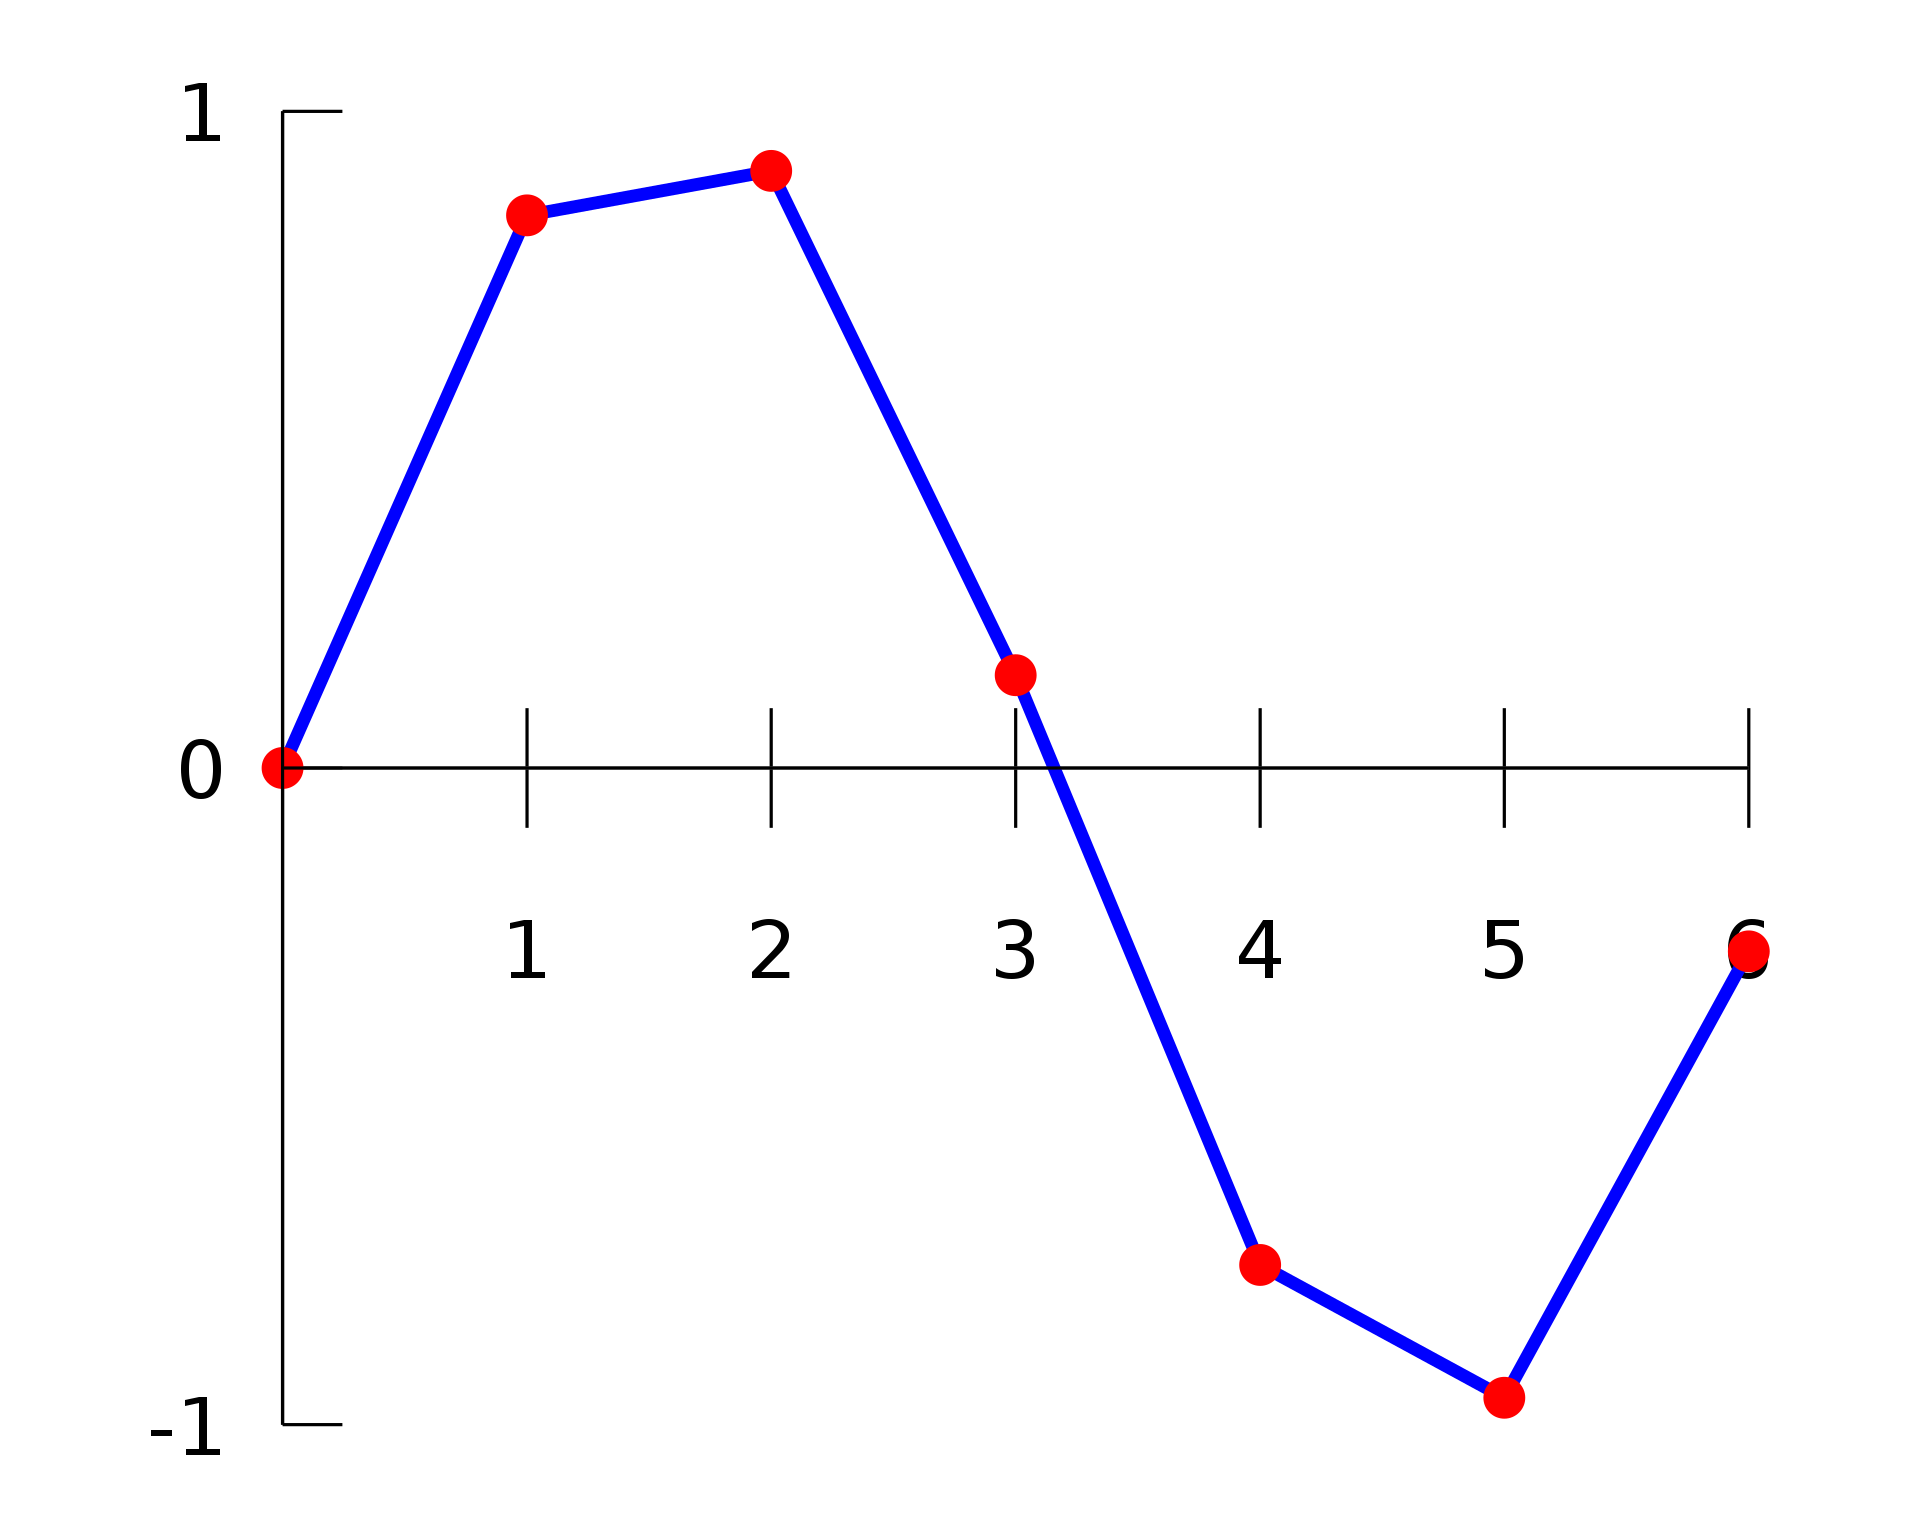
    <figcaption>Linear interpolation example, from <a href="https://en.wikipedia.org/wiki/Linear_interpolation#/media/File:Interpolation_example_linear.svg">Wikipedia.</a></figcaption>
    </figure>
</div>

To do interpolation in Python, we'll use the `interp1d` method from the `scipy.interpolate` module. The help (Shift+Tab) is

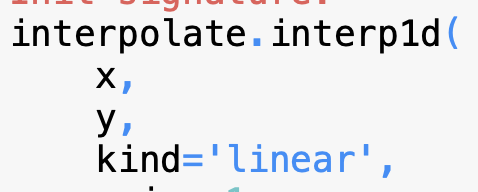

so you give the x-data, then the y-data. See the example below:

In [87]:
# Define the interpolation function for pressure
P_interp = interpolate.interp1d(V_L, P_atm)

# Make 100 data points to plot a smooth curve line or curve...
V_100 = np.linspace(V_L.min(), V_L.max())
P_100 = P_interp(V_100)

**Try it: Plot the data (Pressure vs Volume) as a scatterplot using matplotlib (`plt.scatter`)** Include a line showing the interpolation (`plt.plot(V_100, P_100)`). Remember you can look up the help using Shift+Tab (or look at previous notebooks) and add good axes using `plt.xlabel`, `plt.ylabel`.

### Using the interpolation

**Try it:** Use your interpolating function `P_interp` to estimate pressure of the gas at $T=207$ K and a molar volume of 1 L (Volume $V = \bar{V}$ since the moles of gas $n=1$).

### Is the gas behaving ideally?

**Try it:** Check to see if the gas behaves ideally by making an array `P_ideal` predicting what the pressure of the gas would be if the gas behaved ideally and $P=nRT/V$ (remember $n=1$ mol and $T = 207$ K), then adding a line to your plot showing ideal gas behavior. 

In [49]:
# Define P_ideal; for volume use V_100 (so we get 100 data points)
# For R, since P is in atm, use R = 0.08206 L atm/mol-K


# Make your plot by copying the previous lines,
# then adding a new `plt.plot` for V_100, P_ideal


## Non-linear curve fitting

In the previous part, you should find that the gas has significant deviations from ideality.

The van der Waals equation of state should predict the properties of the gas well even in this case; let's fit the data to the van der Waals equation
$$ P = \frac{RT}{\bar{V} - b} - \frac{a}{\bar{V}^2}$$

where the paramater $b$ represents the size of the gas particles (larger $b$ causes more positive deviations from ideality), and the parameter $a$ represents the strength of the intermolecular forces (larger $a$ = stronger IMFS = larger negative deviations from ideality).

Define the van der Waals equation in Python:

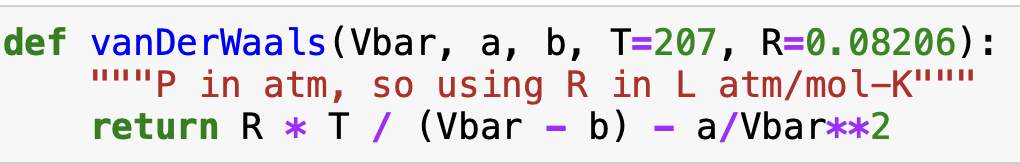

In [ ]:
# Put your function definition here



Now we can do a curve fit:

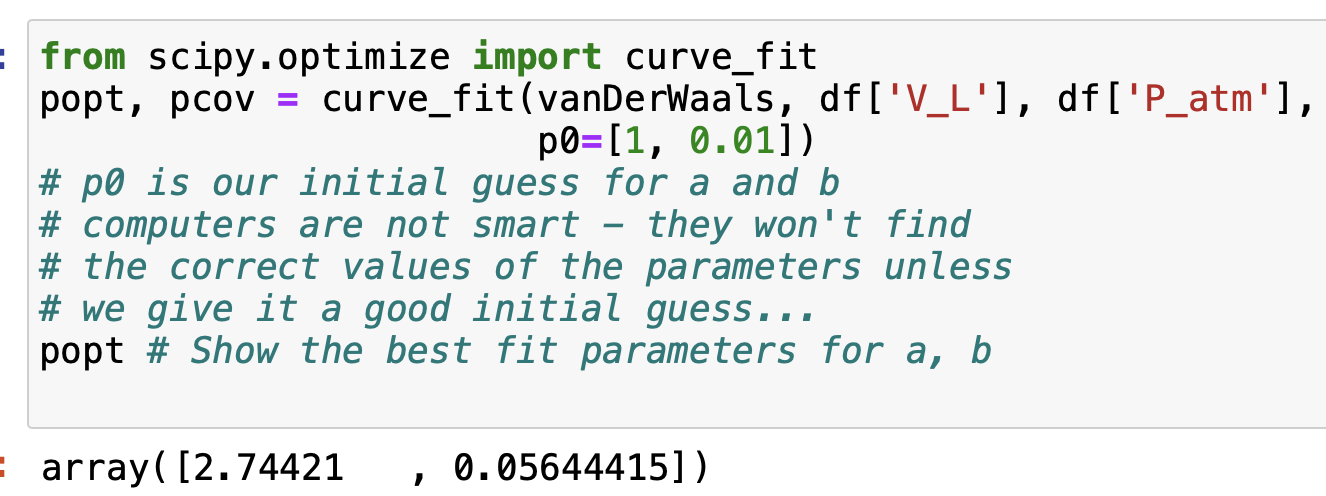


In [89]:
# Do the curve fit here...


Next, define the pressure predicted by the van der Waals equation so we can sanity check the answer:

`P_vanDerWaals = vanDerWaals(V_100, *popt)`

Then make one final plot, something like this:

```python
plt.plot(V_100, P_ideal, '-', label='Ideal')
plt.plot(V_100, P_vanDerWaals, '-', label='VDW')
plt.scatter(V_L, P_atm,  label='Data')
plt.xlabel("Volume $V$ (L)")
plt.ylabel("Pressure $P$ (atm)")
plt.legend()
```

In [90]:
# Do these last steps here...

## Importing from data files

Download a CSV file containing the temperature-dependent heat capacity of ammonia gas from http://hdl.handle.net/10066/17736. Load the file into Python by pulling the data from the url using

```python
df2 = pd.read_csv("https://scholarship.tricolib.brynmawr.edu/bitstream/handle/10066/17736/AmmoniaHeatCapacity.csv?sequence=1&isAllowed=y")
df2
```

In a new cell, save the temperature and Cp to numpy arrays:

```python
T = df2['T/K'].values
Cp = df2['Cp/J/K/mol'].values
```

In [93]:
# Pull in the data to df2...


**Try it:** Use the same procedure from above to create an interpolating function `interpolate.interp1d` and plot the data along with the interpolation (again evaluated at 100 points using `np.linspace`).

In [95]:
# You should define something like 
# Cp_interpolated = interpolate.interp1d
# Remember to Shift+Tab to look up the help


### Numerical integration in Python

To do an integral of a function $f$ from `a` to `b`, use `integrate.quad`. The help is

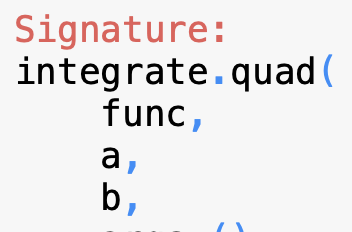

so you give the function, then the lower bound `a`, then the upper bound `b` as the arguments. The outputs of the function are the value of the integral and an estimated error.

In [96]:
from scipy import integrate

# Integrating sine over a full period should be zero
integrate.quad(np.sin, 0, 2*np.pi)


(2.221501482512777e-16, 4.3998892617845996e-14)

The value is close to zero - (the value is $2.2\times10^{-16}$ and the error is two orders of magnitude larger).

Here's an example using data from A6, where you found the area under the curve $3/x$ from $1.5$ to $5$ was

$$\int_{1.5}^5 \frac{3}{x}\, dx = 3.6119 $$

In [98]:
def f(x):
    return 3/x

integrate.quad(f, 1.5, 5)

(3.6119184129778086, 3.1759229531192797e-12)

Python gives the same answer, with a very small error of 3.176e-12. If you want the integral by itself, you can save them to separate variables like this:

In [102]:
result, error = integrate.quad(f, 1.5, 5)
result

3.6119184129778086

### Integrating the heat capacity to determine $\Delta H$

$$\newcommand{\st}[1]{_{\text{#1}}}$$

**Try it:** Use your interpolating function for heat capacity to do the integral for problem 11. on the homework:

Use the constant pressure heat capacity of ammonia (the data and interpolating function above) to determine $\Delta H$ when 1 mol of ammonia is warmed from 300 K to 500 K. At constant pressure,
    $$
    C_P(T) = \frac{dH}{dT}
    $$
    You should be able to use algebra and then integrate both sides to determine
    $$\begin{align*}
    \int_{T\st{i}}^{T\st{f}} C_P(T)\,dT& = \int_{\text{initial}}^{\text{final}} dH\\
    \int_{T\st{i}}^{T\st{f}} C_P(T)\,dT& = \Delta H
    \end{align*}
    $$
    Do the integral in Python and check that your answer is reasonable by approximating assuming the heat capacity is constant.
